# Exercises for Lecture 4 (Performance analysis)

In [11]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-02-06 23:08:10


In [12]:
# Common imports
import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # To make this notebook's output stable across runs

In [13]:
# Fetch MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
#mnist = fetch_openml('mnist_784', parser="pandas")

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
y_train = mnist.target[:60000].to_numpy(dtype=int)
y_test = mnist.target[-10000:].to_numpy(dtype=int)
y_train.shape, y_test.shape

((60000,), (10000,))

In [15]:
X_train = mnist.data[:60000].to_numpy()
X_test = mnist.data[-10000:].to_numpy()
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Exercise 1 : Compute number of examples of each digit.

In [16]:
for i in range(10):
    print(y_train[y_train == i].shape[0])

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


## Exercise 2: Construct target train and test vectors for 8 classifier.

In [17]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

## Exercise 3: Use Scikit-Learn to perform 3-fold cross validation using [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=20);
sgd_clf.fit(X_train, y_train_8)
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.93935, 0.92625, 0.91605])

## Exercise 4: Compute the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

conf_matrix = confusion_matrix(y_train_8, y_train_pred)
conf_matrix

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[52430,  1719],
       [ 2648,  3203]], dtype=int64)

## Exercise 5: Compute the precision and recall for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [20]:
TP, TN, FP, FN = conf_matrix[1][1], conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0]
precision_hand = TP / (TP + FP)
recall_hand = TP /(TP + FN)
print("precision =", precision_hand)
print("recall =", recall_hand)

precision = 0.6507517269402682
recall = 0.5474277901213468


In [21]:
from sklearn.metrics import precision_score, recall_score
precision_sklearn = precision_score(y_train_8, y_train_pred)
recall_sklearn = recall_score(y_train_8, y_train_pred)
precision_sklearn, recall_sklearn

(0.6507517269402682, 0.5474277901213468)

## Exercise 6: Compute the $F_1$ score for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [22]:
f1_score = 2/(1/precision_hand + 1/recall_hand)
f1_score

0.5946347349856121

In [23]:
from sklearn.metrics import f1_score
f1_sklearn = f1_score(y_train_8, y_train_pred)
f1_sklearn

0.5946347349856123

## Exercise 7: Compute the false positive rate for the confusion matrix `conf_matrix` computed above.

In [24]:
false_positive = FP / (FP + TN)
false_positive

0.0317457386101313

## Exercise 8: Where is the ideal point in the ROC curve domain?

top left corner where FPR = 0 and TPR = 1

##  Exercise 9: What is the AUC for an ideal and random classifier?

ideal = 1, random classifier = 0.5

Consider the confusion matrix for multiclass classification.

In [25]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5537,    2,   36,   60,   14,   88,   95,    8,   43,   40],
       [   1, 6367,   31,   31,    7,   24,   11,   23,  226,   21],
       [  27,  112, 4985,  177,   65,   34,  182,   95,  246,   35],
       [  11,   40,  168, 5322,    9,  241,   42,   54,  101,  143],
       [   7,   43,   25,   17, 5107,   29,  102,   28,   61,  423],
       [  42,   30,   32,  314,   68, 4456,  145,   20,  202,  112],
       [  19,   13,   33,    7,   23,   93, 5686,   12,   26,    6],
       [  16,   27,   76,   70,   54,   13,    2, 5536,   39,  432],
       [  30,  207,   84,  331,   57,  467,  104,   40, 4306,  225],
       [  27,   35,   18,  129,  154,   54,    6,  191,   44, 5291]],
      dtype=int64)

## Exercise 10: Convert confusion matrix to probabilities and plot.

In [26]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Text(47.222222222222214, 0.5, 'true value')

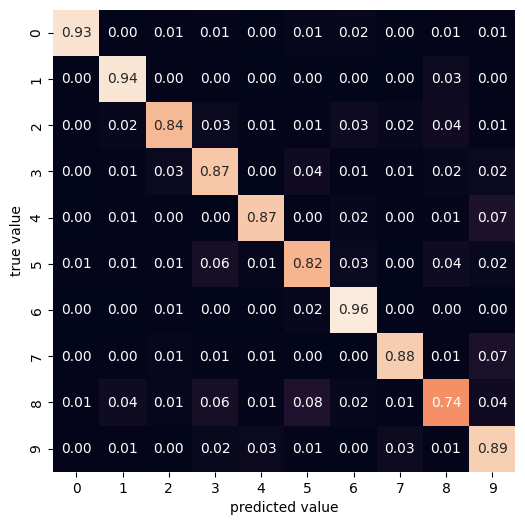

In [27]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(norm_conf_mx, square=True, annot=True, cbar=False, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value')